<a href="https://colab.research.google.com/github/Emma-Ok/MonitoriasLogica2_2024-2/blob/main/Parcial_3_Arboles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Repaso tema de árboles parcial 3
<br/>

*Universidad de Antioquia 2024-2*


In [ ]:
class NodoAVL:
    def __init__(self, valor):
        self.valor = valor
        self.izquierdo = None
        self.derecho = None
        self.altura = 1

def altura(nodo):
    if nodo is None:
        return 0
    return nodo.altura

def actualizar_altura(nodo):
    if nodo is not None:
        nodo.altura = 1 + max(altura(nodo.izquierdo), altura(nodo.derecho))

def calcular_factor_equilibrio(nodo):
    if nodo is None:
        return 0
    return altura(nodo.izquierdo) - altura(nodo.derecho)

def rotacion_izquierda(nodo):# Izquierda-Derecha
    nueva_raiz = nodo.derecho
    nodo.derecho = nueva_raiz.izquierdo
    nueva_raiz.izquierdo = nodo
    actualizar_altura(nodo)
    actualizar_altura(nueva_raiz)
    return nueva_raiz # Actualizar el nuevo nodo padre

def rotacion_derecha(nodo): # Derecha-Izquierda
    nueva_raiz = nodo.izquierdo
    nodo.izquierdo = nueva_raiz.derecho
    nueva_raiz.derecho = nodo
    actualizar_altura(nodo)
    actualizar_altura(nueva_raiz)
    return nueva_raiz # Actualizar el nuevo nodo padre

# Función Principal

def insertar_nodo(raiz, valor):
    if raiz is None:
        return NodoAVL(valor)
    # Crear estructura del árbol AVL
    if valor < raiz.valor: # Compara el hijo con el padre
        raiz.izquierdo = insertar_nodo(raiz.izquierdo, valor)
    elif valor > raiz.valor:
        raiz.derecho = insertar_nodo(raiz.derecho, valor)
    else:
        return raiz # Si se ingresa un único valor

    # Actualizar la altura del árbol
    actualizar_altura(raiz)

    # Calcular el factor de equilibrio
    factor_equilibrio = calcular_factor_equilibrio(raiz)

    # Rotaciones a la derecha o la izquierdo
    if factor_equilibrio > 1:
        if valor < raiz.izquierdo.valor: # Comparar el hijo con el padre del lado izquierdo del arbol
            return rotacion_derecha(raiz) # Rotación simple
        else: # Rotación Doble
            raiz.izquierdo = rotacion_izquierda(raiz.izquierdo)
            return rotacion_derecha(raiz)
    if factor_equilibrio < -1:
        if valor > raiz.derecho.valor:
            return rotacion_izquierda(raiz)
        else:
            raiz.derecho = rotacion_derecha(raiz.derecho)
            return rotacion_izquierda(raiz)

    return raiz # Arreglo de valores

def Mostrar_Enorden(raiz):
    if raiz:
        Mostrar_Enorden(raiz.izquierdo)
        print(raiz.valor, end =" ")
        Mostrar_Enorden(raiz.derecho)

# ELIMINAR NODOS

# Busqueda
def encontrar_nodo_minimo(nodo): # O(n)
    actual = nodo
    while actual.izquierdo is not None:
        actual = actual.izquierdo
    return actual # Posición donde esta el valor

def eliminar_nodo(raiz, valor):
    if raiz is None:
        return raiz

    if valor < raiz.valor:
        raiz.izquierdo = eliminar_nodo(raiz.izquierdo, valor)
    elif valor > raiz.valor:
        raiz.derecho = eliminar_nodo(raiz.derecho, valor)
    else:
        # Si el el nodo a eliminar se encuentra
        if raiz.izquierdo is None:
            temp = raiz.derecho
            raiz = None
            return temp
        elif raiz.derecho is None:
            temp = raiz.izquierdo
            raiz = None
            return temp
        temp = encontrar_nodo_minimo(raiz.derecho)
        raiz.valor = temp.valor
        raiz.derecho = eliminar_nodo(raiz.derecho, temp.valor)

    # Actualizar la altura del árbol
    actualizar_altura(raiz)

    # Calcular el factor de equilibrio
    factor_equilibrio = calcular_factor_equilibrio(raiz)

    # Rotaciones a la derecha o la izquierdo
    if factor_equilibrio > 1:
        if calcular_factor_equilibrio(raiz.izquierdo) >= 0:
            # Rotación a la derecho
            return rotacion_derecha(raiz)
        else:
            raiz.izquierdo = rotacion_izquierda(raiz.izquierdo)
            return rotacion_derecha(raiz)
    if factor_equilibrio < -1:
        if calcular_factor_equilibrio(raiz.derecho) <= 0:
            # Rotación a la izquierda
            return rotacion_izquierda(raiz)
        else:
            raiz.derecho = rotacion_derecha(raiz.derecho)
            return rotacion_izquierda(raiz)

    return raiz # Arreglo de valores

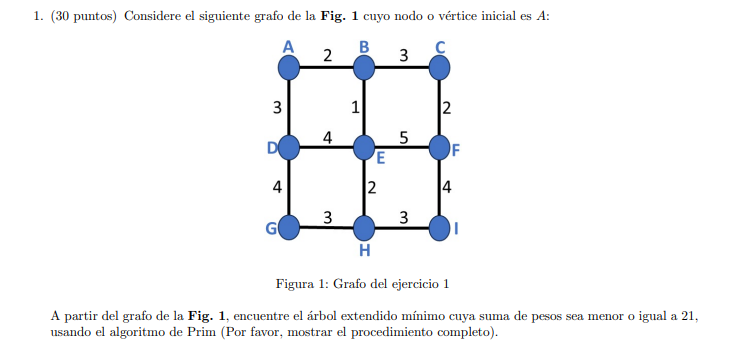

In [ ]:
def min_peso(pesos, nodo_visitado):
  min_pes = float('inf')
  min_nodo = None
  for nodo in pesos:
    if not nodo_visitado[nodo] and pesos[nodo] < min_pes:
      min_pes = pesos[nodo]
      min_nodo = nodo
  return min_nodo

In [ ]:
def prim(W):
  A = []
  v_0 = list(W.keys())[0]
  nodo_visitado = {nodo: False for nodo in W}
  nodo_padre = {nodo: None for nodo in W}
  pesos = {nodo: float('inf') for nodo in W}
  pesos[v_0] = 0
  for _ in range(len(W)):
    u = min_peso(pesos, nodo_visitado)
    nodo_visitado[u] = True
    for v, pes in W[u]:
      if not nodo_visitado[v] and pes < pesos[v]:
        pesos[v] = pes
        nodo_padre[v] = u
  for nodo, nodo_p in nodo_padre.items():
    if nodo_p is not None:
      A.append((nodo_p, nodo, pesos[nodo]))
  return A

In [ ]:
W = {
    'A': [('D', 3), ('B', 2)],
    'B': [('A', 2), ('E', 5), ('C', 3)],
    'C': [('B', 3), ('F', 2)],
    'D': [('A', 3), ('E', 4), ('G', 4)],
    'E': [('B', 1), ('D', 4), ('F', 5), ('H', 2)],
    'F': [('C', 2), ('E', 5), ('I', 4)],
    'G': [('D', 4), ('H', 3)],
    'H': [('E', 2), ('G', 3), ('I', 3)],
    'I': [('F', 4), ('H', 3)]
}
A = prim(W)
print("Arbol Extendido:")
for edge in A:
  print(edge)

Arbol Extendido:
('A', 'B', 2)
('B', 'C', 3)
('A', 'D', 3)
('D', 'E', 4)
('C', 'F', 2)
('H', 'G', 3)
('E', 'H', 2)
('H', 'I', 3)


In [ ]:
def prim_con_limite(W, limite_peso):
    def min_peso(pesos, nodo_visitado):
        # Función auxiliar para encontrar el nodo con el menor peso no visitado
        min_nodo = None
        min_peso = float('inf')
        for nodo, peso in pesos.items():
            if not nodo_visitado[nodo] and peso < min_peso:
                min_peso = peso
                min_nodo = nodo
        return min_nodo

    A = []  # Lista para almacenar las aristas del MST
    v_0 = list(W.keys())[0]  # Nodo inicial (puedes cambiarlo si deseas empezar en otro nodo)
    nodo_visitado = {nodo: False for nodo in W}  # Estado de cada nodo (visitado o no)
    nodo_padre = {nodo: None for nodo in W}  # Nodo padre para cada nodo en el MST
    pesos = {nodo: float('inf') for nodo in W}  # Peso mínimo para cada nodo
    pesos[v_0] = 0  # El peso del nodo inicial se establece en 0

    suma_pesos = 0  # Suma de los pesos del MST

    for _ in range(len(W)):
        u = min_peso(pesos, nodo_visitado)
        if u is None:
            break  # Si no hay más nodos por visitar, terminamos

        nodo_visitado[u] = True
        if nodo_padre[u] is not None:
            # Agregamos la arista al MST y actualizamos la suma de pesos
            peso_arista = pesos[u]
            suma_pesos += peso_arista
            A.append((nodo_padre[u], u, peso_arista))

            # Verificamos si hemos alcanzado el límite de peso
            if suma_pesos >= limite_peso:
                break

        # Explorar los vecinos de `u`
        for v, pes in W[u]:
            if not nodo_visitado[v] and pes < pesos[v]:
                pesos[v] = pes
                nodo_padre[v] = u

    return A, suma_pesos

# Grafo de ejemplo
W = {
    'A': [('B', 2), ('D', 3)],
    'B': [('A', 2), ('C', 3), ('E', 1)],
    'C': [('B', 3), ('F', 2)],
    'D': [('A', 3), ('E', 4), ('G', 4)],
    'E': [('B', 1), ('D', 4), ('F', 5), ('H', 2)],
    'F': [('C', 2), ('E', 5), ('I', 4)],
    'G': [('D', 4), ('H', 3)],
    'H': [('E', 2), ('G', 3), ('I', 3)],
    'I': [('F', 4), ('H', 3)]
}
# Límite de peso
limite_peso = 21

# Ejecutar el algoritmo de Prim con límite de peso
mst, peso_total = prim_con_limite(W, limite_peso)

# Mostrar el resultado
print("Aristas del árbol de expansión mínima (MST) con límite de peso:")
for edge in mst:
    print(f"{edge[0]} - {edge[1]} (Peso: {edge[2]})")

print(f"Suma total de pesos en el MST: {peso_total}")


Aristas del árbol de expansión mínima (MST) con límite de peso:
A - B (Peso: 2)
B - E (Peso: 1)
E - H (Peso: 2)
B - C (Peso: 3)
C - F (Peso: 2)
A - D (Peso: 3)
H - G (Peso: 3)
H - I (Peso: 3)
Suma total de pesos en el MST: 19


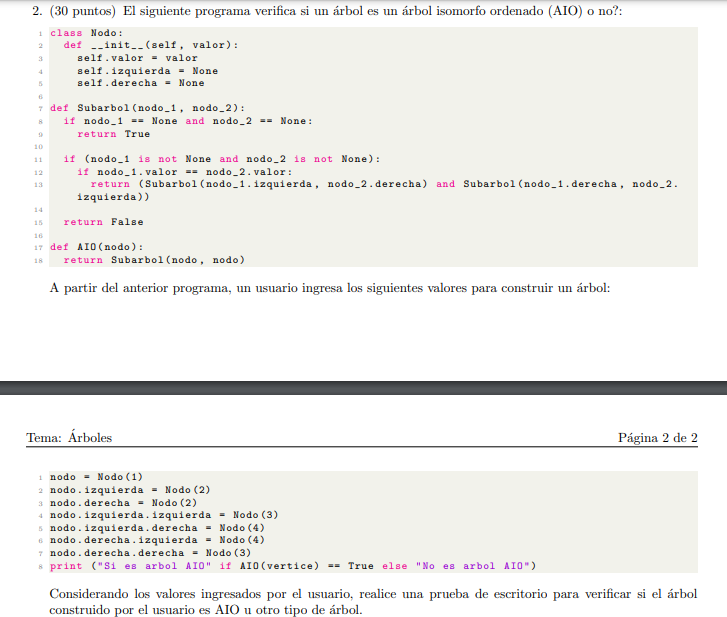

In [ ]:
class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.izquierda = None
        self.derecha = None

def subarbol(nodo_1, nodo_2):
    if nodo_1 is None and nodo_2 is None:
        return True
    if nodo_1 is not None and nodo_2 is not None and nodo_1.valor == nodo_2.valor:
        return (subarbol(nodo_1.izquierda, nodo_2.derecha) and
                subarbol(nodo_1.derecha, nodo_2.izquierda))
    return False

def es_AIO(nodo):
    return subarbol(nodo, nodo)

# Construcción del árbol
nodo = Nodo(1)
nodo.izquierda = Nodo(2)
nodo.derecha = Nodo(2)
nodo.izquierda.izquierda = Nodo(3)
nodo.izquierda.derecha = Nodo(4)
nodo.derecha.izquierda = Nodo(4)
nodo.derecha.derecha = Nodo(3)

# Verificación de AIO
print("Es un árbol AIO" if es_AIO(nodo) else "No es un árbol AIO")


Es un árbol AIO


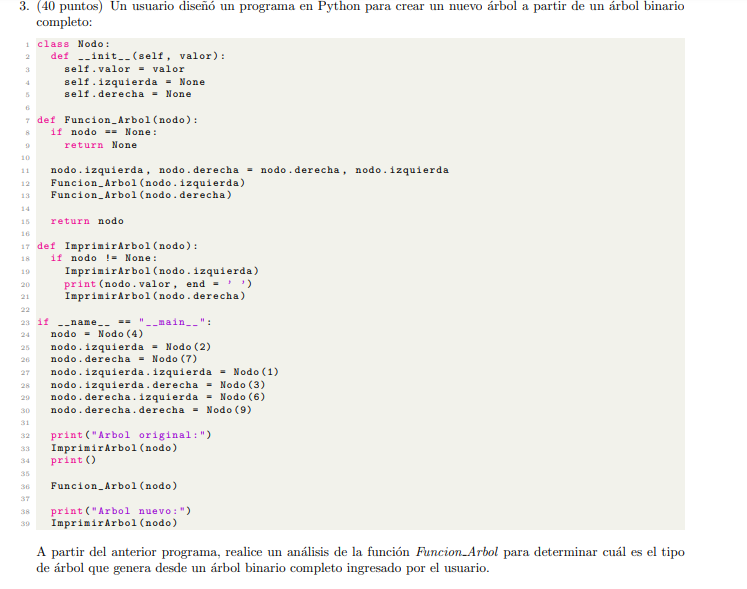

In [ ]:
class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.izquierda = None
        self.derecha = None

def Funcion_Arbol(nodo):
    if nodo is None:
        return None
    # Intercambiar los hijos izquierdo y derecho
    nodo.izquierda, nodo.derecha = nodo.derecha, nodo.izquierda
    Funcion_Arbol(nodo.izquierda)
    Funcion_Arbol(nodo.derecha)
    return nodo

def imprimir_arbol(nodo):
    if nodo is not None:
        imprimir_arbol(nodo.izquierda)
        print(nodo.valor, end=' ')
        imprimir_arbol(nodo.derecha)

# Construcción del árbol original
nodo = Nodo(4)
nodo.izquierda = Nodo(2)
nodo.derecha = Nodo(7)
nodo.izquierda.izquierda = Nodo(1)
nodo.izquierda.derecha = Nodo(3)
nodo.derecha.izquierda = Nodo(6)
nodo.derecha.derecha = Nodo(9)

# Mostrar árbol original
print("Árbol original:")
imprimir_arbol(nodo)
print()

# Generar el nuevo árbol
Funcion_Arbol(nodo)

# Mostrar el nuevo árbol
print("Árbol nuevo:")
imprimir_arbol(nodo)
print()


Árbol original:
1 2 3 4 6 7 9 
Árbol invertido:
9 7 6 4 3 2 1 
